Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly_1a = PolynomialFeatures(1)
PHI_1a = poly_1a.fit_transform(X) # preslikavanje u prostor vise dimenzije


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
PHIT_1b = PHI_1a.transpose() # stvaranje PHI transponirano
PHIT_PHI_1b = np.matmul(PHIT_1b, PHI_1a) # matricno mnozenje PHIT i PHI
INV_1b = np.linalg.inv(PHIT_PHI_1b) # racunanje inverza (PHIT_PHI)
PSEINV1_1b = np.matmul(INV_1b, PHIT_1b) # racunanje pseudoinverza
W1_1b = np.matmul(PSEINV1_1b, y) # izracun tezina W

PSEINV2_1b = np.linalg.pinv(PHI_1a) # izracun pseudoinverza pomocu pinv()
W2_1b = np.matmul(PSEINV2_1b, y) # izracun tezina ""

print('Ne koristimo pinv: {}'.format(W1_1b))
print('Koristimo pinv: {}'.format(W2_1b))

Ne koristimo pinv: [2.2        0.45714286]
Koristimo pinv: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreska ucenja: 2.042857142857143


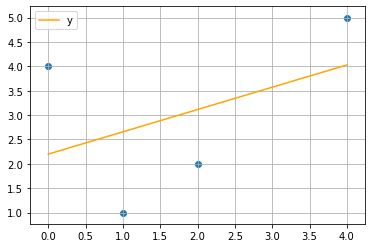

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

H_1c = np.matmul(PHI_1a, W1_1b) # izracun funkcije h(x): linearna regresija
EhD_1c = mean_squared_error(y, H_1c) # izracun kvadratne pogreske
print('Pogreska ucenja: {}'.format(EhD_1c))

# prikazicanje skupa D i funkcije h(x)
plt.plot(X, H_1c, color='orange') 
plt.scatter(X, y)
plt.legend(['y'], loc="best")
plt.grid()
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje

INV_1d = np.linalg.inv(PHI_1a) # racunanje inverza 
W_1d = np.matmul(INV_1d, y)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg_1e = LinearRegression().fit(PHI_1a, y) # racunanje tezina W pomocu LinearRegression 
w0_1e = reg_1e.intercept_ 
w1_1e = reg_1e.coef_[1]
W_1e = np.array([w0_1e, w1_1e])
print(W_1e)
H_1e = reg_1e.predict(PHI_1a) # izracun funkcije h(x) linearne regresije

EhD_1e = mean_squared_error(y, H_1e) # izracun kvadratne funkcije

print('Pogreska ucenja (ne koristimo LinearRegression): {}'.format(EhD_1c))
print('Pogreska ucenja (koristimo LinearRegression): {}'.format(EhD_1e))

[2.2        0.45714286]
Pogreska ucenja (ne koristimo LinearRegression): 2.042857142857143
Pogreska ucenja (koristimo LinearRegression): 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    
    fX = f(X)
    
    NORM =  np.random.normal(loc = 0, scale = noise, size= len(X))
 
    y = []
    
    for i in range(len(X)):
        y.append(fX[i] + NORM[i])
    
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
x1_2a, x2_2a = -5, 5
N_2a = 50
SIGMA_2a = 200

X_2a = make_instances(x1_2a, x2_2a, N_2a) # stvaranje 50 instanci 
#https://chrisalbon.com/machine_learning/vectors_matrices_and_arrays/apply_operations_to_elements/
f = lambda x: (5 + x - 2 * (x**2) - 5 * (x**3)) # definicija funkcije 
y_2a = make_labels(X_2a, f, SIGMA_2a) # stvanje opazenih oznaka f(x) + suma N(0, simga^2)
#print(y_2a)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

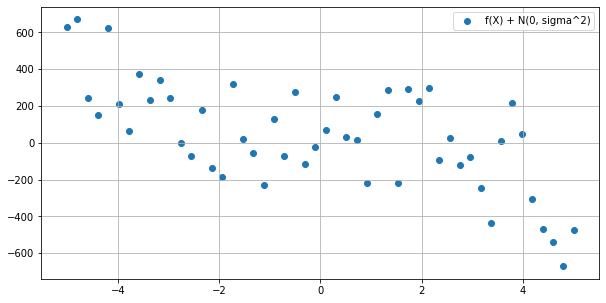

In [11]:
# Vaš kôd ovdje
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
#https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black
plt.figure(figsize=(10,5))
plt.scatter(X_2a, y_2a)
plt.legend(['f(X) + N(0, sigma^2)'], loc="best")
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreska ucenja: 32829.39338772539


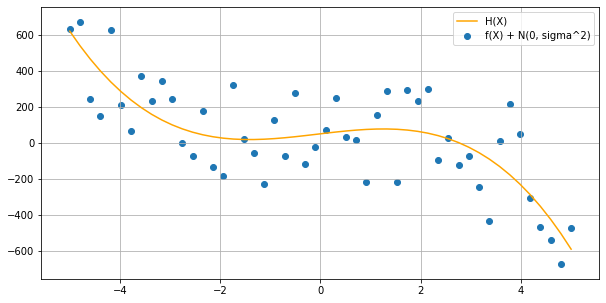

In [12]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
d_2b = 3
poly_2b = PolynomialFeatures(d_2b)
PHI_2b = poly_2b.fit_transform(X_2a) # preslikavanje u prostor vise dimenzije

PSEINV_2b = np.linalg.pinv(PHI_2b) # izracun pseudoinverza PHI
W_2b = np.matmul(PSEINV_2b, y_2a) # izracun W tezina


H_2b = np.matmul(PHI_2b, W_2b) # izracun funkcije h(x) linearne regresije

EhD_2b = mean_squared_error(y_2a, H_2b) # izracun kvadratne funkcije
print('Pogreska ucenja: {}'.format(EhD_2b))

plt.figure(figsize=(10,5))
plt.plot(X_2a, H_2b, color='orange')
plt.scatter(X_2a, y_2a)
plt.legend(['H(X)', 'f(X) + N(0, sigma^2)'], loc="best")
plt.grid()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d = 1: E(h|D) = 48147.12784818034
d = 3: E(h|D) = 32829.39338772539
d = 5: E(h|D) = 32659.28759866477
d = 10: E(h|D) = 29558.402190242145
d = 20: E(h|D) = 19204.652968579274


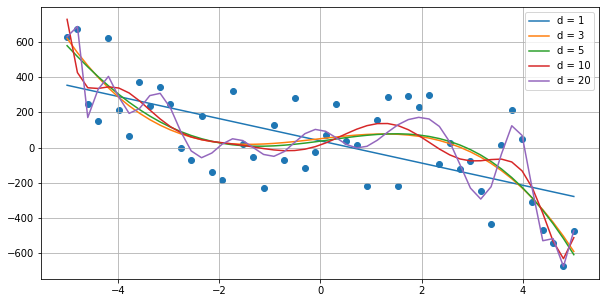

In [14]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

d_3a = np.array([1, 3, 5, 10, 20])

plt.figure(figsize=(10,5))
plt.scatter(X_2a, y_2a)

for i in range(len(d_3a)):
    poly_3a = PolynomialFeatures(d_3a[i]) # preslikavanje u prostor vise dimenzije
    PHI_3a = poly_3a.fit_transform(X_2a) # stvaranje PHI transponirano
    PSEINV_3a = np.linalg.pinv(PHI_3a) # izracun pseudoinverza pomocu pinv()
    W_3a = np.matmul(PSEINV_3a, y_2a) # izracun tezina W
    H_3a = np.matmul(PHI_3a, W_3a) # izracun funkcije h(x): linearna regresija
    EhD_3a = mean_squared_error(y_2a, H_3a) # izracun kvadratne pogreske
    
    

    print("d = {0}: E(h|D) = {1}".format(d_3a[i], EhD_3a))

    plt.plot(X_2a, H_3a, label='d = %d'%(d_3a[i]))
    
plt.legend(loc="best")
plt.grid()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

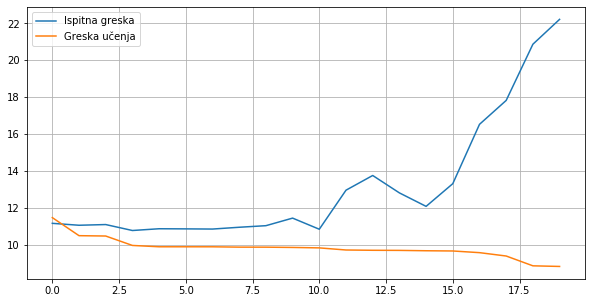

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
# razdvajanje X i y na train i test skup
X_train_3b, X_test_3b, y_train_3b, y_test_3b = train_test_split(X_2a, y_2a, test_size=0.5)
EhD_test_3b = []
EhD_train_3b = []

d_3b = range(0, 20)

for i in range(len(d_3b)):
    poly_3b = PolynomialFeatures(d_3b[i])
    
    ### train
    PHI_train_3b = poly_3b.fit_transform(X_train_3b) # preslikavanje u prostor vise dimenzije
    PSEINV_train_3b = np.linalg.pinv(PHI_train_3b) # izracun pseudoinverza PHI
    W_train_3b = np.matmul(PSEINV_train_3b, y_train_3b) # izracun W tezina
    H_train_3b = np.matmul(PHI_train_3b, W_train_3b) # izracun funkcije h(x) linearne regresije
    
    logEhD_train_3b = np.log(mean_squared_error(y_train_3b, H_train_3b))
    
    EhD_train_3b.append(logEhD_train_3b)
    
    ### test
    PHI_test_3b = poly_3b.fit_transform(X_test_3b)  # preslikavanje u prostor vise dimenzije
    H_test_3b = np.matmul(PHI_test_3b, W_train_3b) # izracun funkcije h(x) linearne regresije
    
    logEhD_test_3b = np.log(mean_squared_error(y_test_3b, H_test_3b))
    
    EhD_test_3b.append(logEhD_test_3b)

plt.figure(figsize=(10, 5))
plt.plot(d_3b, EhD_test_3b, d_3b, EhD_train_3b)
plt.legend(['Ispitna greska', 'Greska učenja'], loc="best")
plt.grid()
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

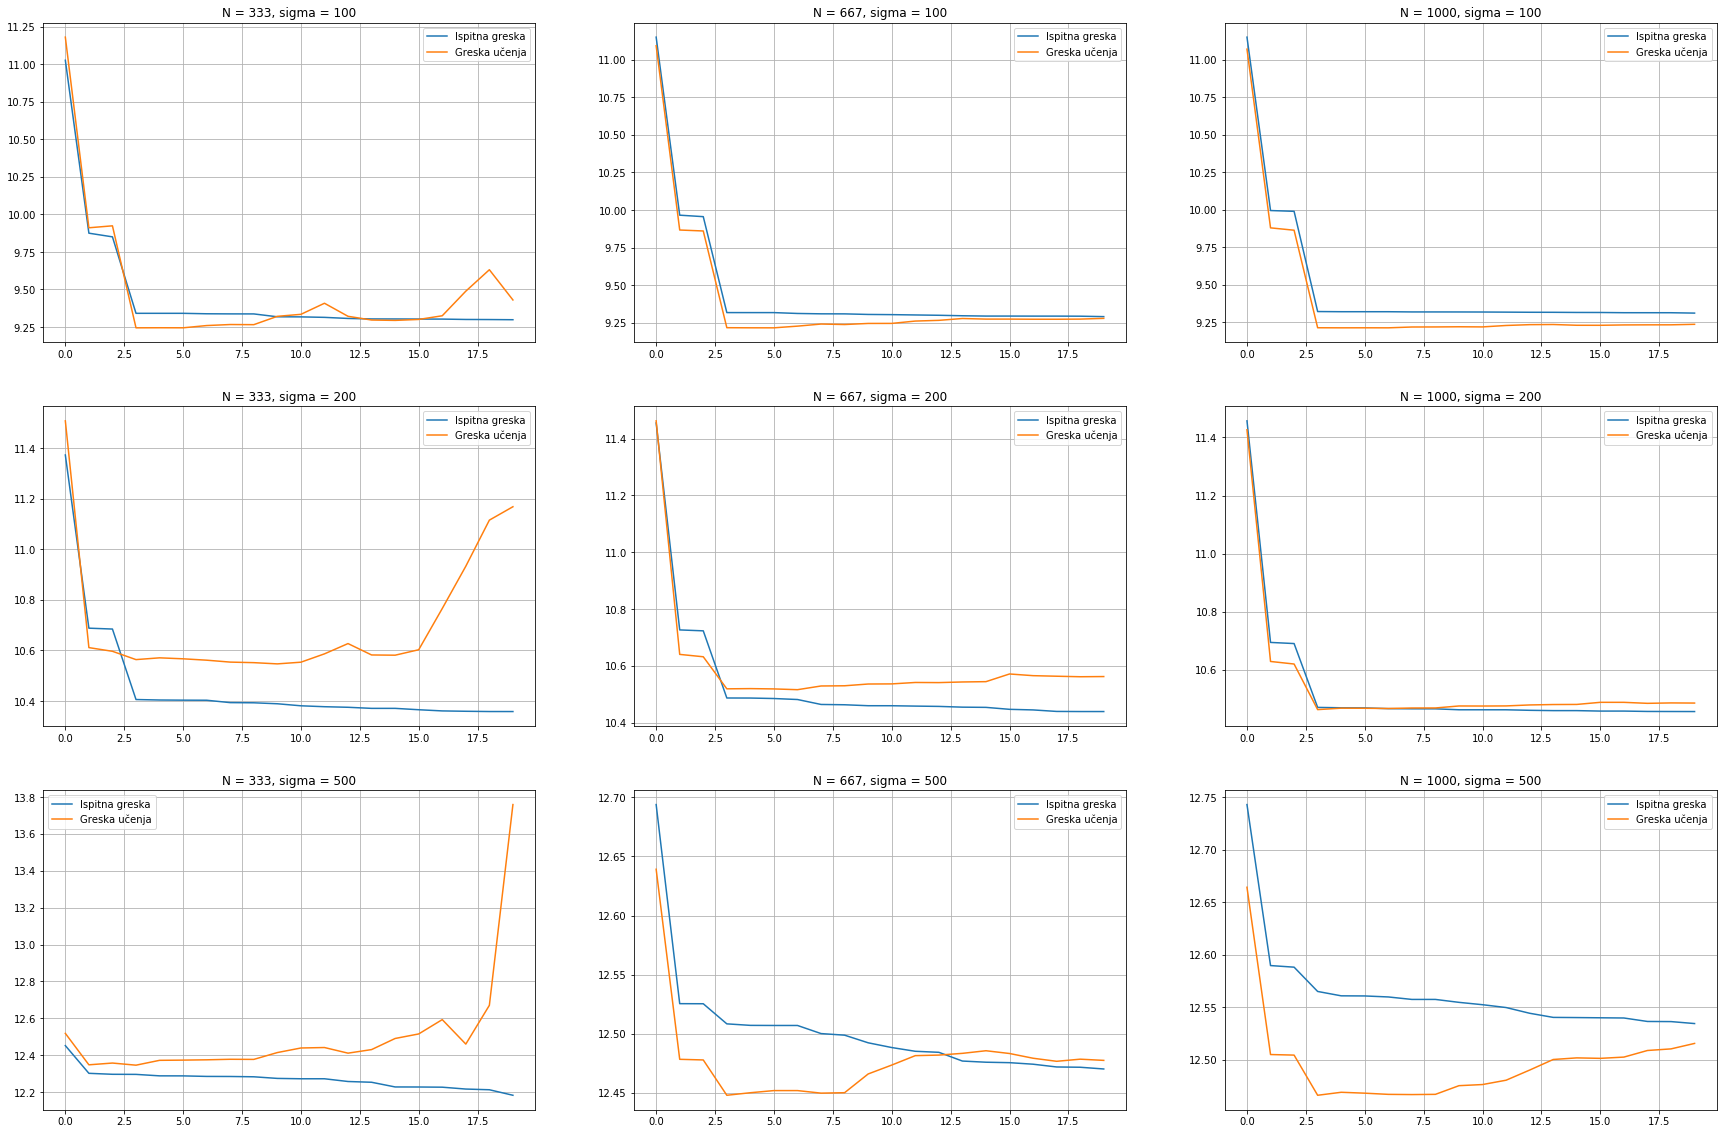

In [17]:
# Vaš kôd ovdje
N_3c = 1000
SIGMA_3c = np.array([100, 200, 500])

X_3c = make_instances(-5, 5, N_3c)
# razdvajanje X na train i test skup
X_train_3c, X_test_3c = train_test_split(X_3c, test_size = 0.5)

X_train_SETS_3c = []
X_test_SETS_3c = []
y_train_SETS_3c = []
y_test_SETS_3c = []
EDh_train_SETS_3c = []
EDh_test_SETS_3c = []

for i in range(len(SIGMA_3c)):
    # izracun y pomocu f(x) + sum
    y_train_3c = make_labels(X_train_3c, f, SIGMA_3c[i])
    y_test_3c = make_labels(X_test_3c, f, SIGMA_3c[i])
    
    # stvaranje podskupova 
    for j in range(3):
        n = round((N_3c*(j+1)/3)/2)
       
        X_train_SETS_3c.append(X_train_3c[0:n])
        X_test_SETS_3c.append(X_test_3c[0:n])
        y_train_SETS_3c.append(y_train_3c[0:n])
        y_test_SETS_3c.append(y_test_3c[0:n])

d_3c = range(0, 20)


fig, axs = plt.subplots(3, 3, figsize=(30,20))

for i in range(len(X_train_SETS_3c)):
    Xi_train_3c = X_train_SETS_3c[i]
    Xi_test_3c = X_test_SETS_3c[i]
    yi_train_3c = y_train_SETS_3c[i]
    yi_test_3c = y_test_SETS_3c[i]
    
    EhD_train_3c = []
    EhD_test_3c = []
    
    
    # izracun pogreska ucenja i ispitnih pogreska 
    for j in range(len(d_3c)):
        poly_3c = PolynomialFeatures(d_3c[j])
        
        ### train
        PHI_train_3c = poly_3c.fit_transform(Xi_train_3c) # preslikavanje u prostor vise dimenzije
        PSEINV_train_3c = np.linalg.pinv(PHI_train_3c) # izracun pseudoinverza PHI
        W_train_3c = np.matmul(PSEINV_train_3c, yi_train_3c) # izracun W tezina
        H_train_3c = np.matmul(PHI_train_3c, W_train_3c) # izracun funkcije h(x) linearne regresije
    
        logEhD_train_3c = np.log(mean_squared_error(yi_train_3c, H_train_3c))
    
        EhD_train_3c.append(logEhD_train_3c)
        
        ### test
        PHI_test_3c = poly_3c.fit_transform(Xi_test_3c)  # preslikavanje u prostor vise dimenzije
        H_test_3c = np.matmul(PHI_test_3c, W_train_3c) # izracun funkcije h(x) linearne regresije
    
        logEhD_test_3c = np.log(mean_squared_error(yi_test_3c, H_test_3c))
    
        EhD_test_3c.append(logEhD_test_3c)

    
    b =  int(i/3)
    c = i%3
    n = round((N_3c*(c+1)/3))
    
    axs[b, c].plot(d_3c, EhD_train_3c, d_3c, EhD_test_3c)
    axs[b, c].set_title('N = %d, sigma = %d'%(n, SIGMA_3c[b]))
    axs[b, c].legend(['Ispitna greska', 'Greska učenja'], loc="best")
    axs[b, c].grid()
plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [18]:
# Vaš kôd ovdje
X_4a = np.array([[0],[1],[2],[4]])
y_4a = np.array([4,1,2,5])
d_4a = 3
poly_4a = PolynomialFeatures(d_4a) 
PHI_4a = poly_4a.fit_transform(X_4a) # preslikavanje u prostor vise dimenzije
PHIT_4a = PHI_4a.transpose() # izracun PHI trasnponirano
PHIT_PHI_4a = np.matmul(PHIT_4a, PHI_4a) # mnozenje PHIT i PHI

lambda_factors_4a = [0, 1, 10]

for i in range(len(lambda_factors_4a)):
    LAMBDA_4a = np.identity(len(PHI_4a)) * lambda_factors_4a[i] # stvaranje regularizacijskih matrica
    LAMBDA_4a[0][0] = 0
    # racunanje pseudoinverza s lambda matricom
    PHIT_PHI_LAMBDA_4a = PHIT_PHI_4a + LAMBDA_4a 
    INV_4a = np.linalg.inv(PHIT_PHI_LAMBDA_4a)
    PSEINV_4a = np.matmul(INV_4a, PHIT_4a)
    
    W_4a = np.matmul(PSEINV_4a, y_4a) # izracun W tezina
    print(W_4a)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [19]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for i in range(len(lambda_factors_4a)):
    # izracun tezina W pomocu Ridge
    clf_4b = Ridge(alpha = lambda_factors_4a[i])    
    clf_4b.fit(PHI_4a, y_4a)
    W_4b = clf_4b.coef_
    W_4b[0] = clf_4b.intercept_
    print(W_4b)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

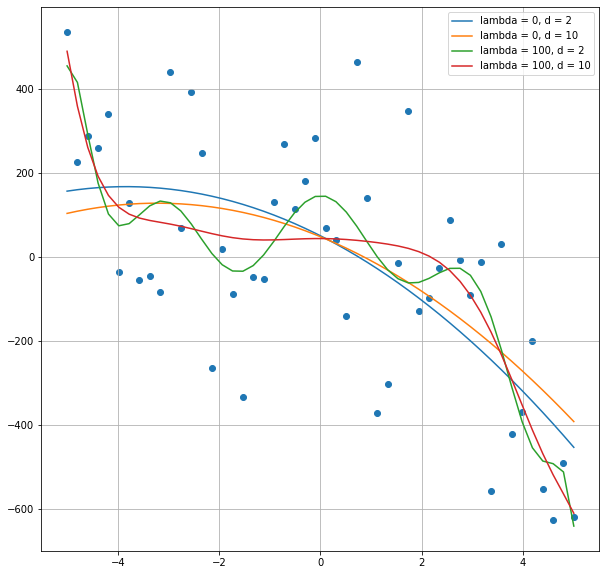

In [20]:
# Vaš kôd ovdje
x1_5a, x2_5a = -5, 5
N_5a = 50
SIGMA_5a = 200

lambda_factors_5a = [0, 100]
d_5a = [2, 10]


X_5a = make_instances(x1_5a, x2_5a, N_5a)
y_5a = make_labels(X_5a, f, SIGMA_5a)

plt.figure(figsize=(10,10))
plt.scatter(X_5a, y_5a)
plt.grid()

for i in range(len(lambda_factors_5a)):
    for j in range(len(d_5a)):
        poly_5a = PolynomialFeatures(d_5a[i])
        PHI_5a = poly_5a.fit_transform(X_5a) # preslikavanje u prostor vise dimenzije
        # izracun pseudoinverza 
        PHIT_5a = PHI_5a.transpose()
        PHIT_PHI_5a = np.matmul(PHIT_5a, PHI_5a)
        LAMBDA_5a = np.identity(len(PHIT_PHI_5a)) * lambda_factors_5a[j]
        LAMBDA_5a[0][0] = 0
        PHIT_PHI_LAMBDA_5a = PHIT_PHI_5a + LAMBDA_5a
        INV_5a = np.linalg.inv(PHIT_PHI_LAMBDA_5a)
        PSEINV_5a = np.matmul(INV_5a, PHIT_5a)
        
        W_5a = np.matmul(PSEINV_5a, y_5a) # izracun tezina W
        H_5a = np.matmul(PHI_5a, W_5a) # izracun funkcije h(x) linearne regresije
       
        plt.plot(X_5a, H_5a, label = 'lambda = %d, d = %d'%(lambda_factors_5a[i], d_5a[j]))
        
        plt.legend(loc="best")
plt.show()
        

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


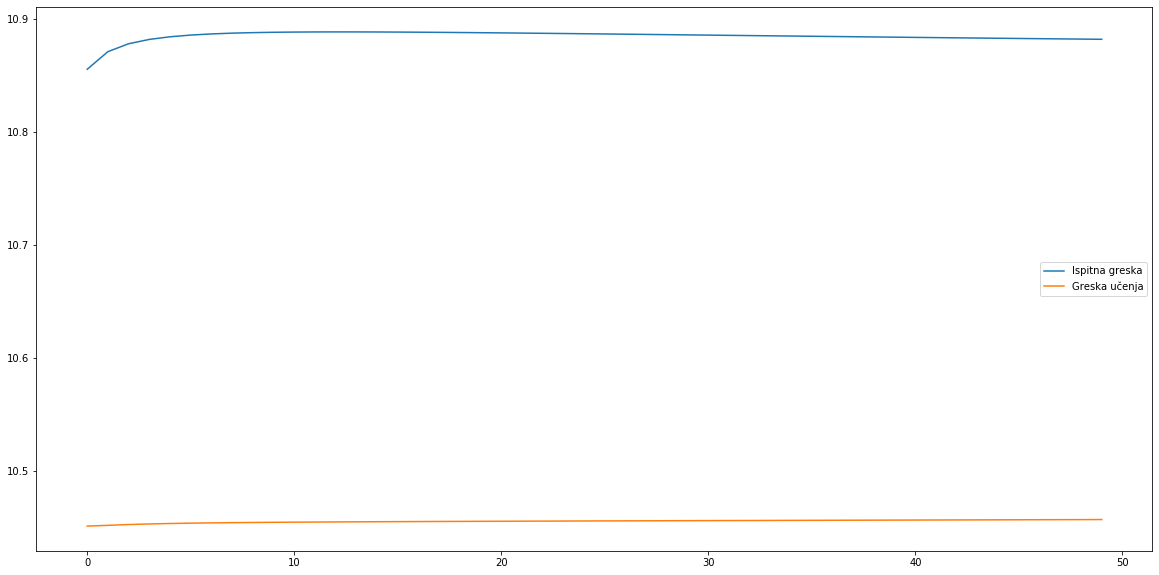

In [21]:
# Vaš kôd ovdje
# razdvanje X i y na skupove train i test
X_train_5b, X_test_5b, y_train_5b, y_test_5b = train_test_split(X_5a, y_5a, test_size=0.5)
EhD_test_5b = []
EhD_train_5b = []

d_5b = 10
lambda_factors_5b = range(50)
for i in range(len(lambda_factors_5b)):
    poly_5b = PolynomialFeatures(d_5b)
    # izracun pseudoinverza 
    PHI_train_5b = poly_5b.fit_transform(X_train_5b)
    PHIT_train_5b = PHI_train_5b.transpose()
    PHIT_PHI_train_5b = np.matmul(PHIT_train_5b, PHI_train_5b)
    LAMBDA_5b = np.identity(len(PHIT_PHI_train_5b)) * lambda_factors_5b[i]
    LAMBDA_5b[0][0] = 0
    PHIT_PHI_LAMBDA_train_5b = PHIT_PHI_train_5b + LAMBDA_5b
    INV_train_5b = np.linalg.inv(PHIT_PHI_LAMBDA_train_5b)
    PSEINV_train_5b = np.matmul(INV_train_5b, PHIT_train_5b)
    
    W_train_5b = np.matmul(PSEINV_train_5b, y_train_5b) # izacun tezina W
    H_train_5b = np.matmul(PHI_train_5b, W_train_5b) # izracun funkcije h(x) linearne regresije
    
    logEhD_train_5b = np.log(mean_squared_error(y_train_5b, H_train_5b))
    
    EhD_train_5b.append(logEhD_train_5b)
    
    PHI_test_5b = poly_5b.fit_transform(X_test_5b)
    H_test_5b = np.matmul(PHI_test_5b, W_train_5b) # izracun funkcije h(x) linearne regresije
    
    logEhD_test_5b = np.log(mean_squared_error(y_test_5b, H_test_5b))
    
    EhD_test_5b.append(logEhD_test_5b)

plt.figure(figsize=(20,10))
plt.plot(lambda_factors_5b, EhD_test_5b, lambda_factors_5b, EhD_train_5b)
plt.legend(['Ispitna greska', 'Greska učenja'], loc="best")
plt.show()


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [22]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

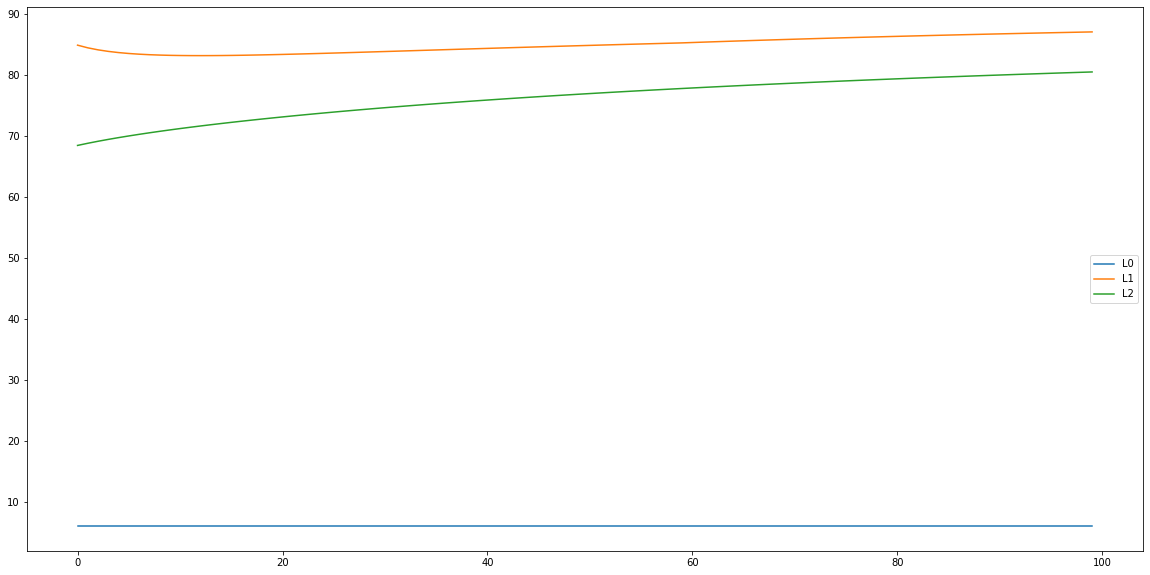

In [23]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
d_6a = 5
lambda_factors_6a = range(100)

L0_6a = []
L1_6a = []
L2_6a = []

# razdvanje X i y na skupove train i test
X_train_6a, X_test_6a, y_train_6a, y_test_6a = train_test_split(X_2a, y_2a, test_size=0.5)

poly_6a = PolynomialFeatures(d_6a)
PHI_train_6a = poly_6a.fit_transform(X_train_6a)
PHIT_train_6a = PHI_train_6a.transpose()
PHIT_PHI_train_6a = np.matmul(PHIT_train_6a, PHI_train_6a)

for i in range(len(lambda_factors_6a)):
    LAMBDA_6a = np.identity(len(PHIT_PHI_train_6a)) * lambda_factors_6a[i]
    LAMBDA_6a[0][0] = 0
    PHIT_PHI_LAMBDA_train_6a = PHIT_PHI_train_6a + LAMBDA_6a
    INV_train_6a = np.linalg.inv(PHIT_PHI_LAMBDA_train_6a)
    PSEINV_train_6a = np.matmul(INV_train_6a, PHIT_train_6a)
    W_train_6a = np.matmul(PSEINV_train_6a, y_train_6a) # izracun tezina W
    
    
    L0_6a.append(nonzeroes(W_train_6a))
    L1_6a.append(sum(abs(W_train_6a)))
    L2_6a.append(math.sqrt(np.matmul(W_train_6a.transpose(), W_train_6a)))

plt.figure(figsize=(20,10))
plt.plot(lambda_factors_6a, L0_6a, lambda_factors_6a, L1_6a, lambda_factors_6a, L2_6a)
plt.legend(['L0', 'L1', 'L2'], loc="best")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443664.5993128835, tolerance: 155.2718382236494
  positive)


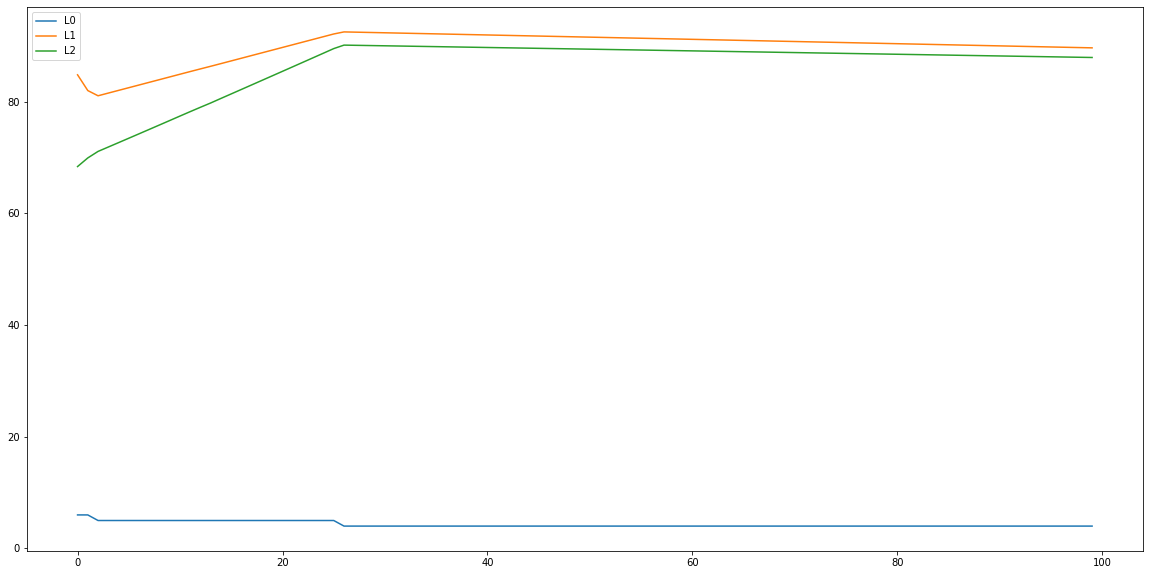

In [24]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

#d = 5
#lambda_faktors = range(100)

L0_6b = []
L1_6b = []
L2_6b = []



for i in range(len(lambda_factors_6a)):
    clf_6b = Lasso(alpha = lambda_factors_6a[i])
    clf_6b.fit(PHI_train_6a, y_train_6a)
    W_train_6b = clf_6b.coef_
    W_train_6b[0] = clf_6b.intercept_
    
    L0_6b.append(nonzeroes(W_train_6b))
    L1_6b.append(sum(abs(W_train_6b)))
    L2_6b.append(math.sqrt(np.matmul(W_train_6b.transpose(), W_train_6b)))

plt.figure(figsize=(20,10))
plt.plot(lambda_factors_6a, L0_6b, lambda_factors_6a, L1_6b, lambda_factors_6a, L2_6b)
plt.legend(['L0', 'L1', 'L2'], loc="best")
plt.show()  

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [25]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

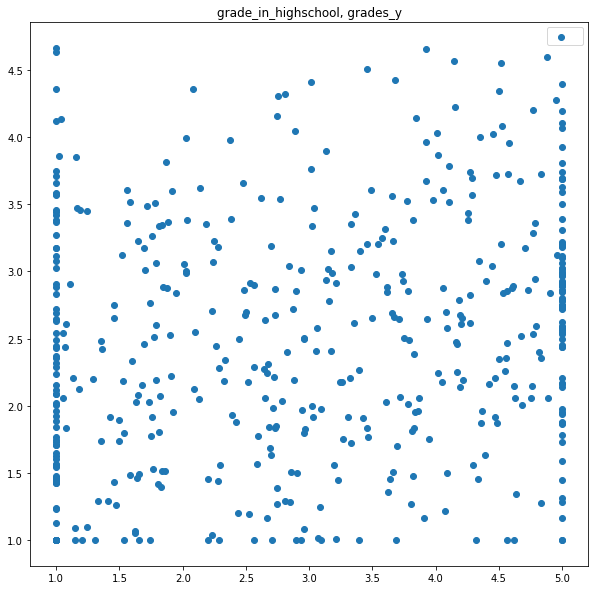

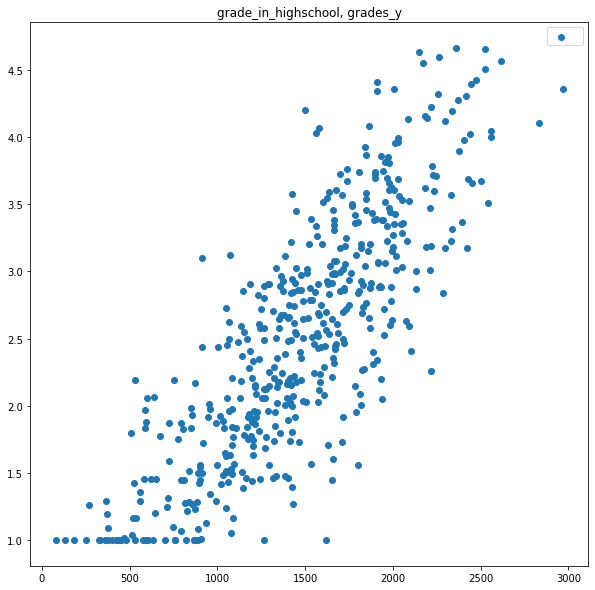

In [26]:
# Vaš kôd ovdje
grade_in_highschool.sort
plt.figure(figsize=(10,10))
plt.scatter(grade_in_highschool, grades_y)
plt.title('grade_in_highschool, grades_y')
plt.legend([''], loc="best")
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(exam_score, grades_y)
plt.title('grade_in_highschool, grades_y')
plt.legend([''], loc="best")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [27]:
# Vaš kôd ovdje
lambda_factor_7b = 0.01
clf_7b = Ridge(alpha = lambda_factor_7b)
clf_7b.fit(grades_X, grades_y)
W_grades_7b = clf_7b.coef_
W_grades_7b0 = clf_7b.intercept_
print(W_grades_7b0)
print(W_grades_7b)

0.15061179575776018
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [28]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler_7b = StandardScaler()

#scaler.fit(grades_X)

grades_X_fixed_7b = scaler_7b.fit_transform(grades_X)
grades_y_fixed_7b = scaler_7b.fit_transform(np.array([grades_y]).transpose())
lambda_factor_7b = 0.01
clf_7b_2 = Ridge(alpha = lambda_factor_7b)
clf_7b_2.fit(grades_X_fixed_7b, grades_y_fixed_7b)
W_grades_7b_2 = clf_7b_2.coef_
W_grades_7b0_2 = clf_7b_2.intercept_
print(W_grades_7b0_2)
print(W_grades_7b_2)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [29]:
# Vaš kôd ovdje

grades_X_fixed_colinear = []
for i in range(len(grades_X_fixed_7b)):
    
    grade = [grades_X_fixed_7b[i][0], grades_X_fixed_7b[i][1], grades_X_fixed_7b[i][1]]   
    grades_X_fixed_colinear.append(grade)


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [30]:
# Vaš kôd ovdje

lambda_factor_8a = 0.01
clf_8a = Ridge(alpha = lambda_factor_8a)
clf_8a.fit(grades_X_fixed_colinear, grades_y_fixed_7b)
W_grades_8a = clf_8a.coef_
W_grades_8a0 = clf_8a.intercept_
print(W_grades_8a0)
print(W_grades_8a)

[8.07031579e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [31]:
# Vaš kôd ovdje

lambda_factors_8b = [0.01, 1000]
W_001_8b = []
W_1000_8b = []

for i in range(10):
    print("i = {}".format(i+1))
    # uzimamo 50% primjera 
    grades_X_train_8b, grades_X_test_8b, grades_y_train_8b, grades_y_test_8b = train_test_split(grades_X_fixed_colinear, grades_y_fixed_7b, test_size=0.5)
    
    # izracun lambda = 0.01
    clf_8b_1 = Ridge(alpha = lambda_factors_8b[0])
    clf_8b_1.fit(grades_X_train_8b, grades_y_train_8b)
    W_grades_8b_1 = clf_8b_1.coef_
   
    print(W_grades_8b_1)
    W_001_8b.append(W_grades_8b_1)
    # izracun lambda = 1000
    clf_8b_2 = Ridge(alpha = lambda_factors_8b[1])
    clf_8b_2.fit(grades_X_train_8b, grades_y_train_8b)
    W_grades_8b_2 = clf_8b_2.coef_
   
    print(W_grades_8b_2)
    W_1000_8b.append(W_grades_8b_2)


W_001_0 = []
W_001_1 = []
W_001_2 = []

W_1000_0 = []
W_1000_1 = []
W_1000_2 = []



for i in range(10):
    W_001_0.append(W_001_8b[i][0][0])
    W_001_1.append(W_001_8b[i][0][1])
    W_001_2.append(W_001_8b[i][0][2])
    
    W_1000_0.append(W_1000_8b[i][0][0])
    W_1000_1.append(W_1000_8b[i][0][1])
    W_1000_2.append(W_1000_8b[i][0][2])
    
print("Lambda = 0.01 :\n {}, {}, {}".format(np.std(W_001_0), np.std(W_001_1), np.std(W_001_2)))
print("Lambda = 1000 :\n {}, {}, {}".format(np.std(W_1000_0), np.std(W_1000_1), np.std(W_1000_2)))

i = 1
[[0.79385128 0.06504303 0.06504303]]
[[0.16436364 0.03812874 0.03812874]]
i = 2
[[0.80739011 0.0761075  0.0761075 ]]
[[0.15992321 0.02415424 0.02415424]]
i = 3
[[0.814158   0.07673386 0.07673386]]
[[0.16128257 0.02717137 0.02717137]]
i = 4
[[0.83265053 0.07483515 0.07483515]]
[[0.16579999 0.03405283 0.03405283]]
i = 5
[[0.79735626 0.08013669 0.08013669]]
[[0.15703356 0.02664742 0.02664742]]
i = 6
[[0.81845427 0.04525193 0.04525193]]
[[0.17833349 0.03188297 0.03188297]]
i = 7
[[0.80086373 0.0614553  0.0614553 ]]
[[0.15563723 0.022474   0.022474  ]]
i = 8
[[0.81216485 0.06648337 0.06648337]]
[[0.16174675 0.03077003 0.03077003]]
i = 9
[[0.81501911 0.04444567 0.04444567]]
[[0.16591703 0.01772788 0.01772788]]
i = 10
[[0.81925961 0.07443972 0.07443972]]
[[0.16617211 0.03087282 0.03087282]]
Lambda = 0.01 :
 0.011026717248037221, 0.012169449475434961, 0.012169449475329181
Lambda = 1000 :
 0.006027658005080764, 0.005675240020786071, 0.005675240020786073


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.